In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
from pyod.models.iforest import IForest
import numpy as np
from sklearn.metrics import classification_report
from pyod.models.hbos import HBOS
from sklearn.metrics import accuracy_score



In [2]:
df=pd.read_csv("/Users/saikarthik/Desktop/Nexus-S1 Deakin /cleaned.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'value'], dtype='object')

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)


In [5]:
df.columns

Index(['timestamp', 'value'], dtype='object')

In [6]:
mean_value = df['value'].mean()
std_dev_value = df['value'].std()

In [7]:
threshold_upper = mean_value + (1.5 * std_dev_value)
threshold_lower = mean_value - 3 * std_dev_value

In [8]:
def label_anomalies(value):
    if value > threshold_upper or value < threshold_lower:
        return 1  # Anomaly
    else:
        return 0  # Not an anomaly



In [9]:
df['true_labels'] = df['value'].apply(label_anomalies)


In [10]:
df["true_labels"].value_counts()

true_labels
0    22225
1      470
Name: count, dtype: int64

## Isolation Forest 

In [11]:
X = df[['value']].values


In [12]:
clf = IForest(contamination=0.1, random_state=42)

In [13]:
clf.fit(X)


IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=42,
    verbose=0)

In [14]:
y_pred_if = clf.predict(X) 

In [15]:
y_scores_if= clf.decision_function(X)

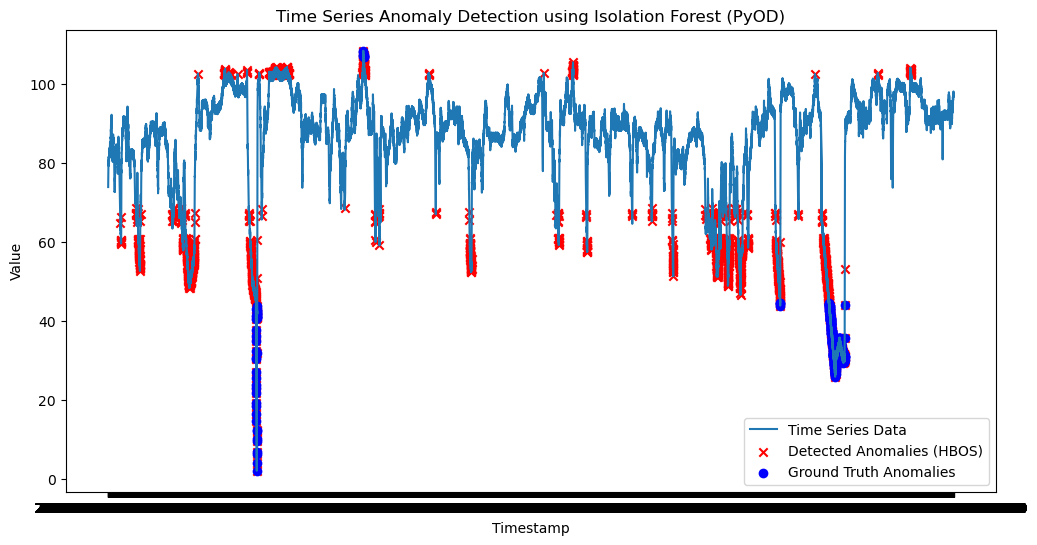

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['value'], label='Time Series Data')
plt.scatter(df['timestamp'][y_pred_if== 1], df['value'][y_pred_if== 1], 
            color='red', marker='x', label='Detected Anomalies (HBOS)')
plt.scatter(df['timestamp'][df['true_labels'] == 1], df['value'][df['true_labels'] == 1], 
            color='blue', marker='o', label='Ground Truth Anomalies')
plt.title('Time Series Anomaly Detection using Isolation Forest (PyOD)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

In [17]:
print(classification_report(df['true_labels'], y_pred_if))


              precision    recall  f1-score   support

           0       1.00      0.92      0.96     22225
           1       0.21      1.00      0.34       470

    accuracy                           0.92     22695
   macro avg       0.60      0.96      0.65     22695
weighted avg       0.98      0.92      0.95     22695



In [18]:
accuracy = accuracy_score(df['true_labels'], y_pred_if)
accuracy*100

92.08636263494162

## HBOS

In [ ]:
clf_hbos = HBOS()
clf_hbos.fit(X)

In [ ]:
y_predict_hbos = clf_hbos.predict(X)

In [ ]:
y_scores_hbos=clf_hbos.decision_function(X)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['value'], label='Time Series Data')
plt.scatter(df['timestamp'][y_predict_hbos == 1], df['value'][y_predict_hbos == 1], 
            color='red', marker='x', label='Detected Anomalies (HBOS)')
plt.scatter(df['timestamp'][df['true_labels'] == 1], df['value'][df['true_labels'] == 1], 
            color='blue', marker='o', label='Ground Truth Anomalies')
plt.title('Time Series Anomaly Detection using HBOS (PyOD)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
print(classification_report(df['true_labels'], y_predict_hbos ))


In [ ]:
accuracy = accuracy_score(df['true_labels'], y_predict_hbos)
accuracy*100